In [300]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud

In [301]:
# Importing Datasets
df_reviews = pd.read_csv("./kaggle/input/IMDB Dataset.csv")
df_movies = pd.read_csv("./kaggle/input/movie_metadata.csv")

In [302]:
df_reviews["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [303]:
print("Movies Database Overview:")
df_movies.describe()

Movies Database Overview:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [304]:
print("Reviews Database Overview:")
df_reviews.describe()

Reviews Database Overview:


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [305]:
df_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [306]:
df_movies.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [307]:
df_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [308]:
df_reviews.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [309]:
df_movies.dropna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [310]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [311]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [312]:
df_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [313]:
# Data Processing
sort_by_imdb = df_movies.sort_values("imdb_score", ascending=False)
top_5_imdb = sort_by_imdb.head()
bottom_5_imdb = sort_by_imdb.tail()
count_by_genre = df_movies["genres"].value_counts()

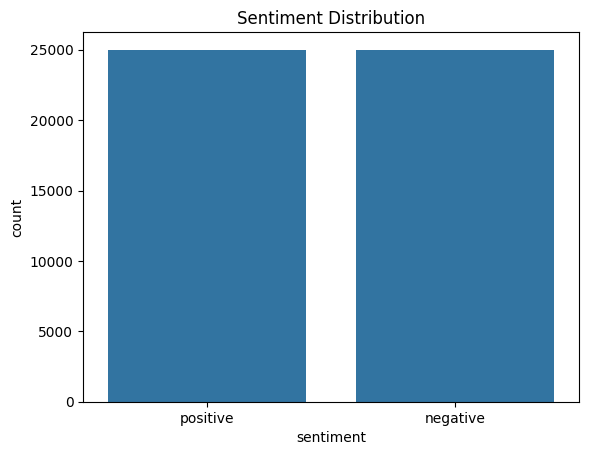

In [314]:
# Checking the Overall Sentiment Distribution
sns.countplot(data=df_reviews, x="sentiment")
plt.title("Sentiment Distribution")
plt.show()

# 1) Review Text Length Analysis


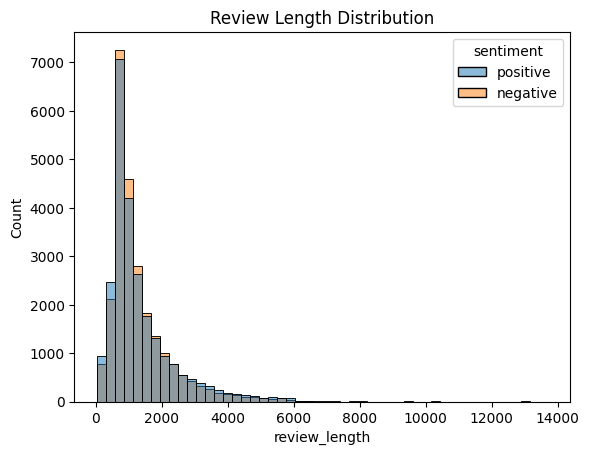

In [315]:
df_reviews["review_length"] = df_reviews["review"].apply(len)
sns.histplot(data=df_reviews, x="review_length", hue="sentiment", bins=50)
plt.title("Review Length Distribution")
plt.show()

# 2) Wordcloud Of Positive Reviews


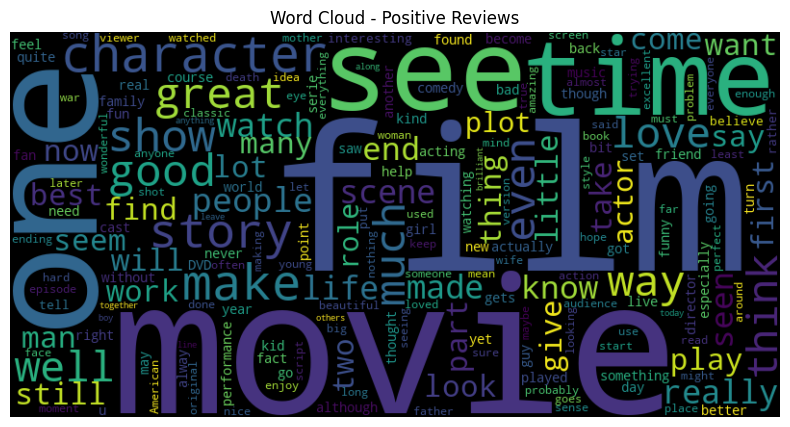

In [316]:
# Wordcloud positive
positive_reviews = df_reviews[df_reviews["sentiment"] == "positive"]["review"]
cleaned_reviews = positive_reviews.str.replace(r"\bbr\b", "", regex=True)
positive_wordcloud = WordCloud(width=800, height=400).generate(
    " ".join(cleaned_reviews)
)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title("Word Cloud - Positive Reviews")
plt.axis("off")
plt.show()

# 3) Worldcloud Of Negative Reviews


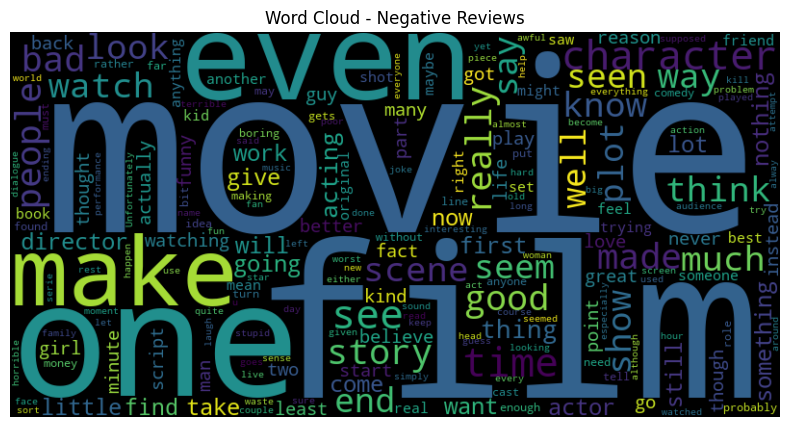

In [317]:
# Wordcloud negative
negative_reviews = df_reviews[df_reviews["sentiment"] == "negative"]["review"]
cleaned_reviews = negative_reviews.str.replace(r"\bbr\b", "", regex=True)
negative_wordcloud = WordCloud(width=800, height=400).generate(
    " ".join(cleaned_reviews)
)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title("Word Cloud - Negative Reviews")
plt.axis("off")
plt.show()

# 4) Analyzing Movie Duration Distribution


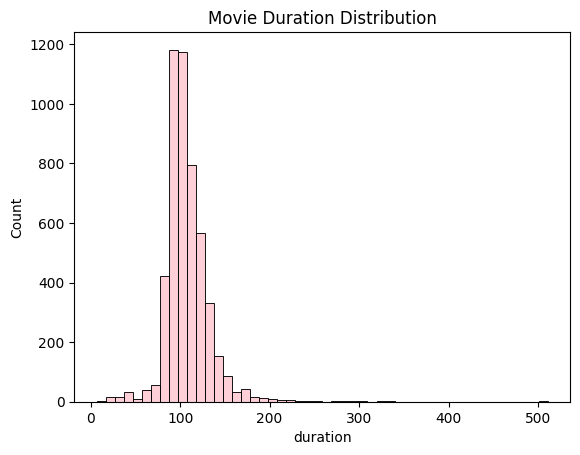

In [318]:
# Analyze movie duration
sns.histplot(data=df_movies, x="duration", color="pink", bins=50)
plt.title("Movie Duration Distribution")
plt.show()

# 5) Analyzing IMDb Score Distribution


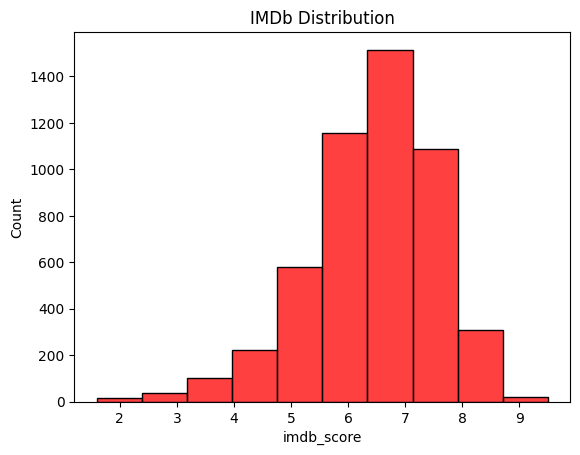

In [319]:
# Analyze IMDb score counts
sns.histplot(data=df_movies, x="imdb_score", bins=10, color="red")
plt.title("IMDb Distribution")
plt.show()

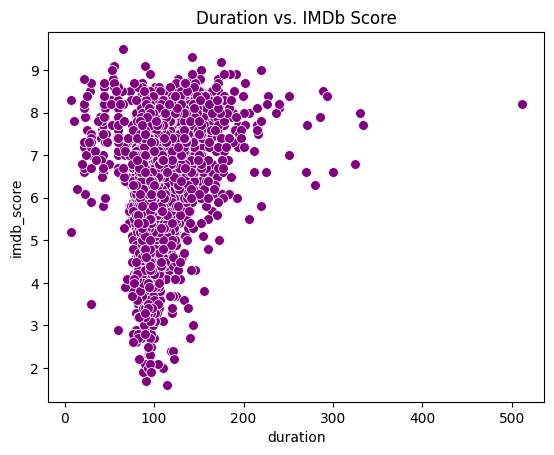

In [320]:
sns.scatterplot(data=df_movies, x="duration", y="imdb_score", color="purple", s=50)
plt.title("Duration vs. IMDb Score")
plt.show()

# 7) Movies with Top 5 IMDb Scores


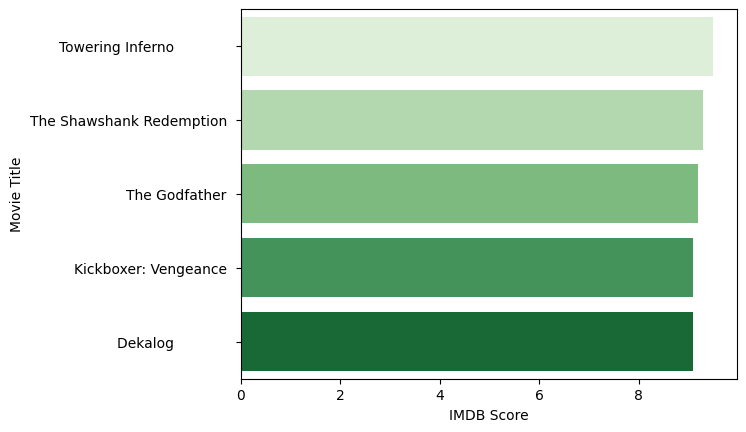

In [321]:
sns.barplot(
    data=top_5_imdb,
    y="movie_title",
    x="imdb_score",
    hue="movie_title",
    palette=sns.color_palette("Greens", n_colors=len(top_5_imdb)),
    legend=False,
)
plt.xlabel("IMDB Score")
plt.ylabel("Movie Title")
plt.show()

# 8) Movies with Bottom 5 IMDb Scores


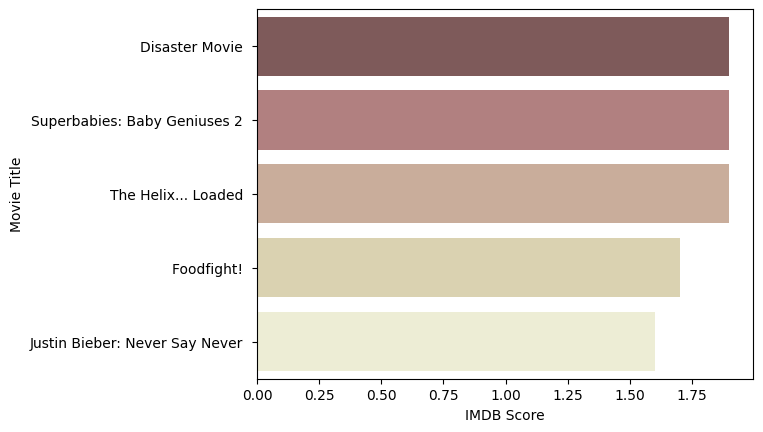

In [322]:
sns.barplot(
    data=bottom_5_imdb,
    y="movie_title",
    x="imdb_score",
    hue="movie_title",
    palette=sns.color_palette("pink", n_colors=len(bottom_5_imdb)),
    legend=False,
)

plt.xlabel("IMDB Score")
plt.ylabel("Movie Title")
plt.show()

# 9) Top & Bottom 5 Genres by movie count


In [323]:
print(count_by_genre)

genres
Drama                                         236
Comedy                                        209
Comedy|Drama                                  191
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Crime|Drama|Mystery|Sci-Fi|Thriller             1
Adventure|Comedy|Crime|Drama                    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Action|Drama|Fantasy|Horror|Thriller            1
Comedy|Crime|Horror                             1
Name: count, Length: 914, dtype: int64


# 10) Analyzing number of movies by content rating


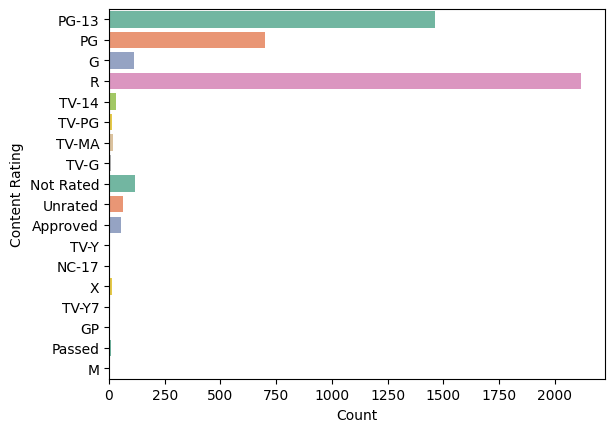

In [324]:
sns.countplot(
    data=df_movies,
    y="content_rating",
    palette="Set2",
    hue="content_rating",
    legend=False,
)
plt.ylabel("Content Rating")
plt.xlabel("Count")
plt.show()

## 11) Analyzing Content Rating trend with IMDb rating


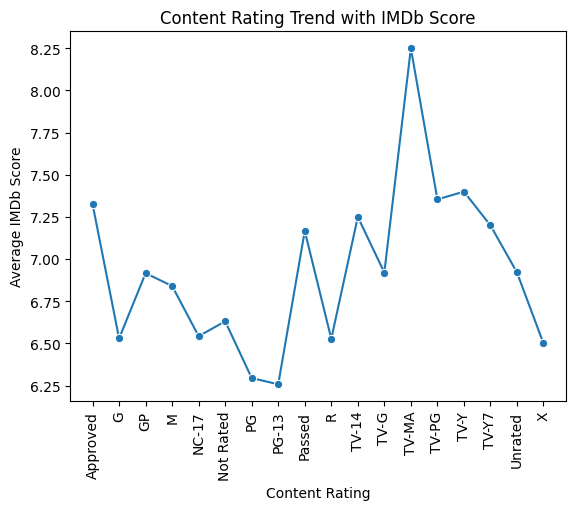

In [ ]:
# Calculate the average IMDb score for each content rating
avg_imdb_score = df_movies.groupby("content_rating")["imdb_score"].mean().reset_index()

sns.lineplot(data=avg_imdb_score, x="content_rating", y="imdb_score", marker="o")
plt.title("Content Rating Trend with IMDb Score")
plt.xlabel("Content Rating")
plt.ylabel("Average IMDb Score")
plt.xticks(rotation=90)
plt.show()

# 12) View And Saving All Movies That Are In Hindi


In [326]:
df_movies["movie_title"]

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [327]:
hindi_movies = df_movies[df_movies.language == "Hindi"]
hindi_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1056,Color,Deepa Mehta,34.0,110.0,375.0,59.0,Gulshan Grover,113.0,528972.0,Drama|Romance|War,...,55.0,Hindi,India,Unrated,NaN,1998.0,102.0,7.8,NaN,522
3075,Color,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000.0,3275443.0,Drama,...,264.0,Hindi,India,R,700000000.0,2006.0,1000.0,6.0,2.35,659
3085,Color,Sajid Khan,10.0,144.0,0.0,119.0,Boman Irani,564.0,1165104.0,Comedy,...,43.0,Hindi,India,NaN,NaN,2010.0,154.0,5.3,NaN,250
3208,Color,Rakesh Roshan,20.0,168.0,53.0,45.0,Rekha,307.0,NaN,Action|Adventure|Romance|Sci-Fi,...,110.0,Hindi,India,Not Rated,10000000.0,2006.0,200.0,6.3,2.35,533
3276,Color,Yash Chopra,50.0,176.0,147.0,1000.0,Katrina Kaif,8000.0,3047539.0,Drama|Romance,...,286.0,Hindi,India,Not Rated,7217600.0,2012.0,3000.0,6.9,2.35,12000
3344,Color,Karan Johar,210.0,128.0,160.0,81.0,Jimmy Shergill,8000.0,4018695.0,Adventure|Drama|Thriller,...,235.0,Hindi,India,PG-13,12000000.0,2010.0,327.0,8.0,2.35,27000
3348,Color,Vipul Amrutlal Shah,15.0,128.0,11.0,119.0,Clive Standen,3000.0,1207007.0,Comedy|Drama|Romance,...,47.0,Hindi,India,NaN,NaN,2007.0,687.0,7.3,NaN,341
3350,Color,Ayan Mukerji,25.0,160.0,0.0,417.0,Madhuri Dixit,964.0,3827466.0,Comedy|Drama|Musical|Romance,...,102.0,Hindi,India,Not Rated,NaN,2013.0,551.0,6.9,NaN,0
3455,Color,Siddharth Anand,16.0,153.0,5.0,60.0,Mary Goggin,532.0,872643.0,Comedy|Family|Romance,...,37.0,Hindi,USA,NaN,6000000.0,2007.0,249.0,5.4,NaN,108
3510,Color,Yash Chopra,29.0,192.0,147.0,397.0,Preity Zinta,8000.0,2921738.0,Drama|Musical|Romance,...,119.0,Hindi,India,NaN,7000000.0,2004.0,860.0,7.9,2.35,2000


In [328]:
df_movies.drop(
    columns=[
        "movie_imdb_link",
        "color",
        "movie_title",
        "facenumber_in_poster",
        "plot_keywords",
        "actor_3_name",
        "aspect_ratio",
    ]
)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,4834,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,11700,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,143,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,2283,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,1753,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,0,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,2386,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,660


# 13) Label Encoding Categorical Data


In [329]:
# Label Encoded the categorical columns in the dataset and transformed them into numerical values
cat_cols = [
    "content_rating",
    "director_name",
    "genres",
    "actor_1_name",
    "actor_2_name",
    "country",
]
le = LabelEncoder()
for col in cat_cols:
    df_movies[col] = le.fit_transform(df_movies[col])
df_movies.dtypes

color                         object
director_name                  int32
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int32
actor_1_facebook_likes       float64
gross                        float64
genres                         int32
actor_1_name                   int32
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                        int32
content_rating                 int32
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

# 14) Log Transformation


In [330]:
df_movies.columns
df_movies.dtypes

color                         object
director_name                  int32
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int32
actor_1_facebook_likes       float64
gross                        float64
genres                         int32
actor_1_name                   int32
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                        int32
content_rating                 int32
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [331]:
skewed_features = [
    [
        "director_name",
        "num_critic_for_reviews",
        "duration",
        "director_facebook_likes",
        "actor_3_facebook_likes",
        "actor_2_name",
        "actor_1_facebook_likes",
        "gross",
        "genres",
        "actor_1_name",
        "num_voted_users",
        "cast_total_facebook_likes",
        "facenumber_in_poster",
        "num_user_for_reviews",
        "country",
        "content_rating",
        "budget",
        "title_year",
        "actor_2_facebook_likes",
        "imdb_score",
        "movie_facebook_likes",
    ],
]

In [332]:
for feature in skewed_features:
    df_movies[feature] = np.log(df_movies[feature] + 1)

# 14) Splitting Dataset


In [333]:
X = df_movies.drop(labels=["imdb_score", "color"], axis=1)
Y = df_movies["imdb_score"]

In [334]:
X.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,6.827629,6.584791,5.187386,0.000000,6.752270,7.248504,6.908755,20.449494,4.672829,5.579730,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,8.024535,English,4.143135,2.079442,19.283571,7.605890,6.842683,1.78,10.404293
1,6.678342,5.713733,5.135798,6.335054,6.908755,7.703910,10.596660,19.550159,4.615121,6.884487,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.122060,English,4.143135,2.079442,19.519293,7.604894,8.517393,2.35,0.000000
2,7.611842,6.401917,5.003946,0.000000,5.087596,7.819234,9.305741,19.114199,4.852030,5.857933,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.902743,English,4.127134,2.079442,19.316769,7.608871,5.976351,2.35,11.350418
3,5.924256,6.701960,5.105945,9.998843,10.043293,6.278521,10.203629,19.920595,5.662960,7.582738,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,7.901748,English,4.143135,2.079442,19.336971,7.607381,10.043293,2.35,12.007628
4,6.398595,NaN,NaN,4.882802,NaN,7.796469,4.882802,NaN,6.625392,6.259581,...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,4.189655,2.944439,NaN,NaN,2.564949,NaN,0.000000


In [335]:
Y.head()

0    2.186051
1    2.091864
2    2.054124
3    2.251292
4    2.091864
Name: imdb_score, dtype: float64

In [336]:
# Splitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=40
)

X_train = X_train.dropna()
X_test = X_test.dropna()
Y_train = Y_train.loc[X_train.index]  # Keep Y_train aligned with X_train
Y_test = Y_test.loc[X_test.index]

X_train = X_train.select_dtypes(include=[np.number])  # Keep only numeric columns
X_test = X_test.select_dtypes(include=[np.number])  

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

print(X_train.dtypes)
print(Y_train.dtypes)

(3034, 21) (747, 21) (3034,) (747,)
director_name                float64
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                 float64
actor_1_facebook_likes       float64
gross                        float64
genres                       float64
actor_1_name                 float64
num_voted_users              float64
cast_total_facebook_likes    float64
facenumber_in_poster         float64
num_user_for_reviews         float64
country                      float64
content_rating               float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
aspect_ratio                 float64
movie_facebook_likes         float64
dtype: object
float64


# 15) Linear Regression


RMSE training data  0.12247020079663967
RMSE testing data  0.11169790762351409
--------------------------------------------------
RSquared Value on Train:  0.40415780328028805
RSquared Value on Test:  0.4010551035453619
--------------------------------------------------
Accuracy:  95.78 %


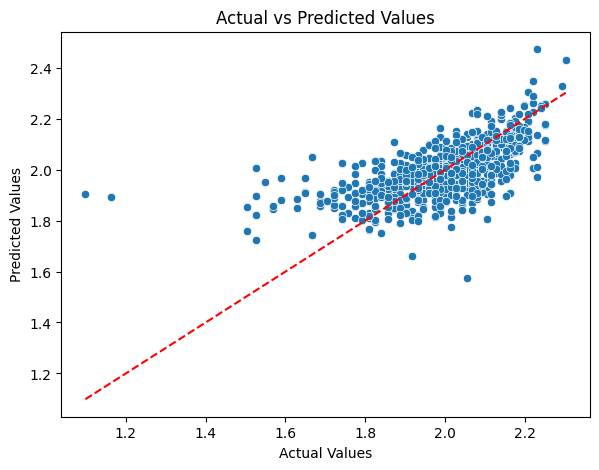

In [339]:
# Fit the model
lm = LinearRegression()
lm = lm.fit(X_train, Y_train)

# Train data prediction
train_pred = lm.predict(X_train)

# Test data prediction
test_pred = lm.predict(X_test)

# Root Mean Squared Error Calculation
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))

print("RMSE training data ", RMSE_train)
print("RMSE testing data ", RMSE_test)
print("-" * 50)
print("RSquared Value on Train: ", lm.score(X_train, Y_train))
print("RSquared Value on Test: ", lm.score(X_test, Y_test))
print("-" * 50)

# Accuracy achieved
error = abs(test_pred - Y_test)
meanError = 100 * (error / Y_test)
accuracy = 100 - np.mean(meanError)
print("Accuracy: ", round(accuracy, 2), "%")

# ---------------- PLOTTING ---------------- #

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_test, y=test_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='dashed')  # Identity line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()